In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv('revenue_time.csv')

In [3]:
df.head(10)

,Day Index,Revenue
0,4/13/17,$224.80
1,4/14/17,$0.00
2,4/15/17,$0.00
3,4/16/17,$0.00
4,4/17/17,$0.00
5,4/18/17,$113.26
6,4/19/17,$110.83
7,4/20/17,$0.00
8,4/21/17,$0.00
9,4/22/17,$0.00


In [6]:
df['Day Index'] = pd.to_datetime(df['Day Index'])
df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)
df['Revenue'] = pd.to_numeric(df['Revenue'])
df['Weekday'] = df['Day Index'].dt.day_name()
df['Weekday'] = pd.Categorical(df['Weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
df['Month'] = df['Day Index'].dt.month
revenue = df.set_index('Day Index')
revenue

,Revenue,Weekday,Month,Monthname
Day Index,,,,
2017-04-13,224.80,Thursday,4,April
2017-04-14,0.00,Friday,4,April
2017-04-15,0.00,Saturday,4,April
2017-04-16,0.00,Sunday,4,April
2017-04-17,0.00,Monday,4,April
2017-04-18,113.26,Tuesday,4,April
2017-04-19,110.83,Wednesday,4,April
2017-04-20,0.00,Thursday,4,April
2017-04-21,0.00,Friday,4,April


In [7]:
revenue = revenue[:'2019-01-20']

In [8]:
revenue_2018 = revenue['2018']

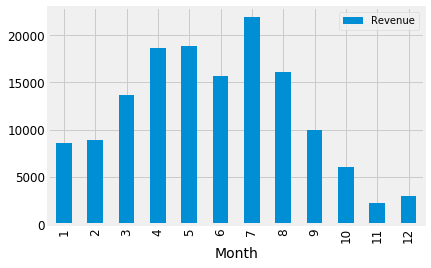

In [9]:
revenue_2018.groupby('Month').sum().plot(kind = 'bar', sort_columns = True)

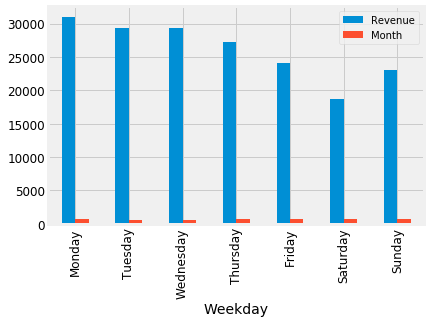

In [10]:
revenue.groupby('Weekday').sum().plot(kind = 'bar', sort_columns = True)

In [11]:
revenue.groupby('Weekday').Revenue.sum().values

array([31040.01, 29314.76, 29392.28, 27192.3 , 24131.61, 18697.32,
       23118.6 ])

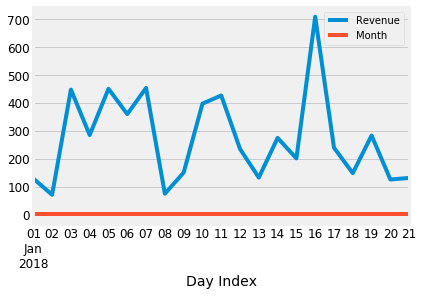

In [12]:
revenue['2018-01-01':'2018-01-21'].plot()

In [15]:
list(revenue['2018-01-01':'2019-01-29'].Revenue)

[129.54,
 71.41,
 448.5,
 285.38,
 451.35,
 360.52,
 454.36,
 75.22,
 150.76,
 398.05,
 427.32,
 235.58,
 133.06,
 275.35,
 201.78,
 709.52,
 240.1,
 148.86,
 283.77,
 126.24,
 131.78,
 463.54,
 227.72,
 231.35,
 406.55,
 150.02,
 146.98,
 228.45,
 416.58,
 276.91,
 267.4,
 517.66,
 20.6,
 213.71,
 24.16,
 86.27,
 245.11,
 256.8,
 202.31,
 168.88,
 319.22,
 395.43,
 411.41,
 24.16,
 11.75,
 223.91,
 95.53,
 238.3,
 148.52,
 290.06,
 474.45,
 623.36,
 576.17,
 750.5,
 152.88,
 365.68,
 716.39,
 1037.73,
 270.06,
 967.57,
 182.23,
 488.41,
 204.82,
 375.4,
 155.94,
 66.91,
 801.91,
 703.96,
 293.52,
 225.46,
 415.9,
 346.1,
 918.25,
 884.03,
 182.46,
 268.59,
 446.73,
 873.53,
 377.39,
 446.35,
 186.37,
 567.45,
 484.39,
 405.6,
 240.05,
 251.22,
 698.31,
 121.99,
 746.78,
 339.59,
 269.57,
 590.1,
 489.43,
 630.06,
 1128.49,
 436.26,
 509.29,
 628.95,
 1078.76,
 657.29,
 405.3,
 1025.21,
 1067.71,
 155.37,
 662.08,
 440.59,
 680.21,
 445.82,
 577.43,
 297.07,
 152.38,
 623.95,
 834.91,


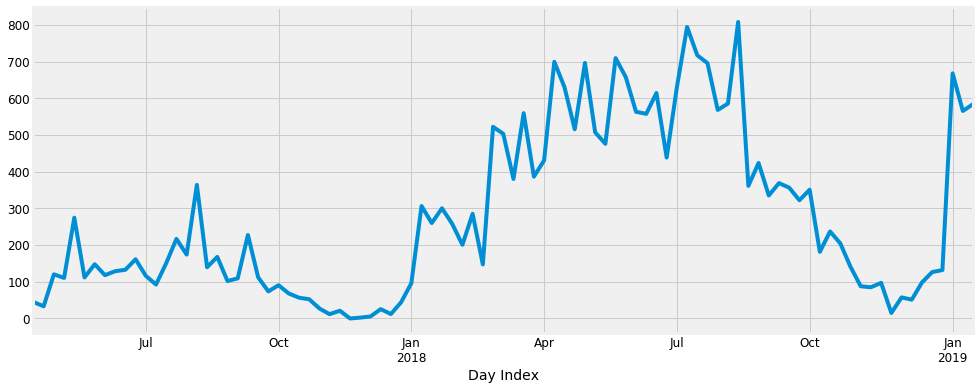

In [16]:
#weekly
weekly = revenue['Revenue'].resample('W-MON').mean()
weekly.plot(figsize=(15, 6))
plt.show()

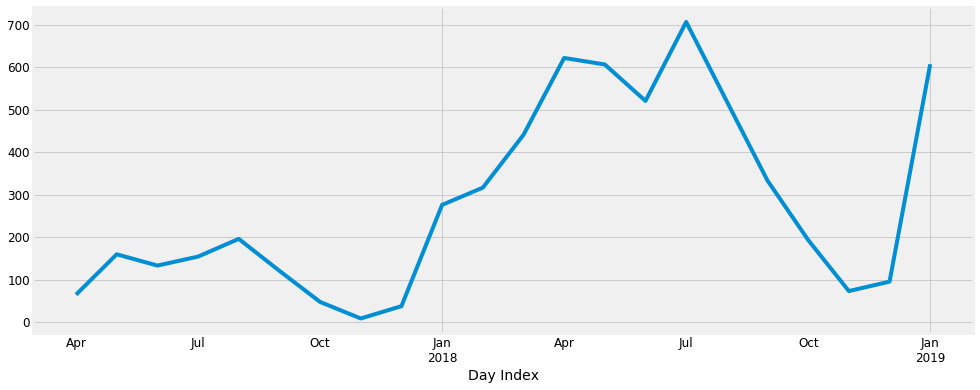

In [10]:
#weekly
monthly = revenue['Revenue'].resample('MS').mean()
monthly.plot(figsize=(15, 6))
plt.show()

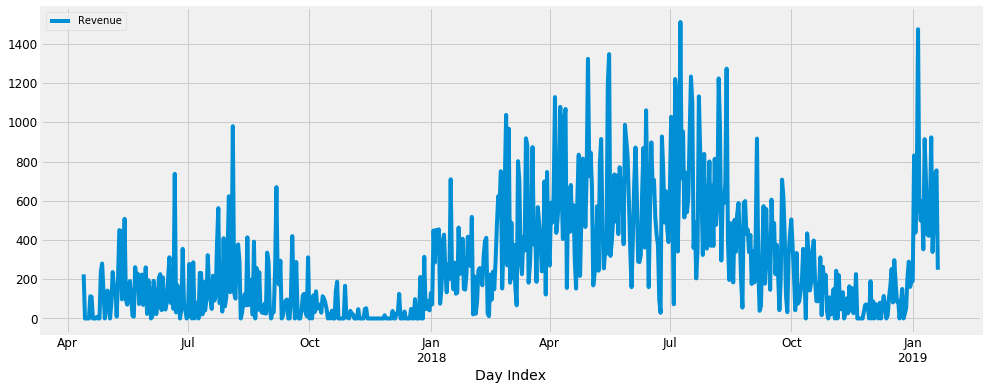

In [11]:
revenue.plot(figsize=(15, 6))
plt.show()

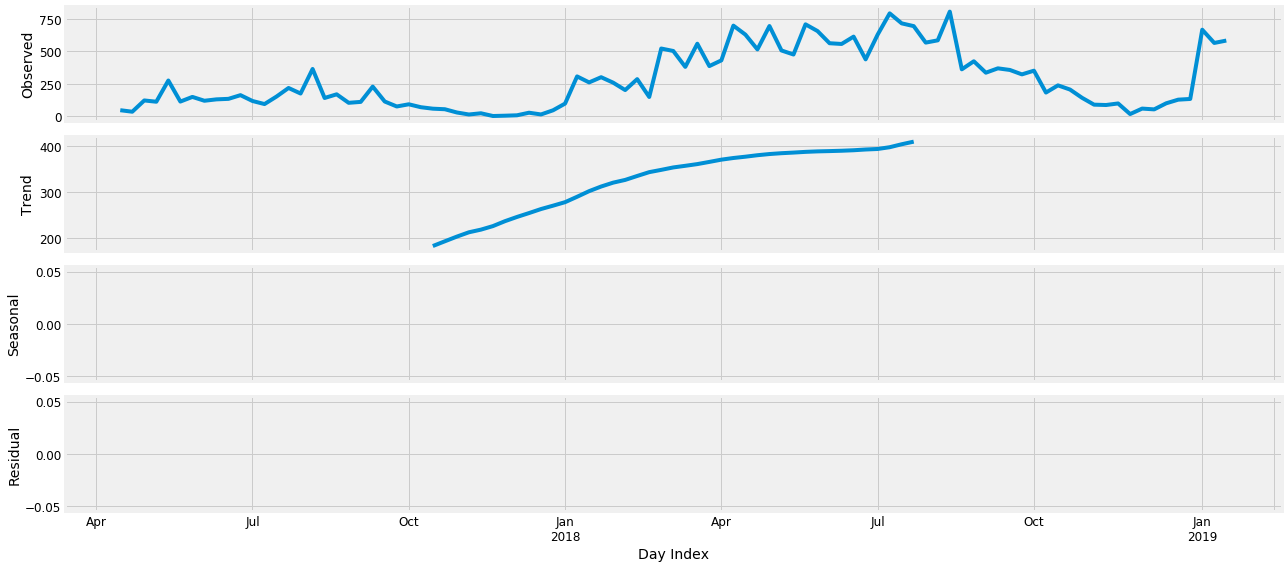

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(weekly, model='additive')
fig = decomposition.plot()
plt.show()

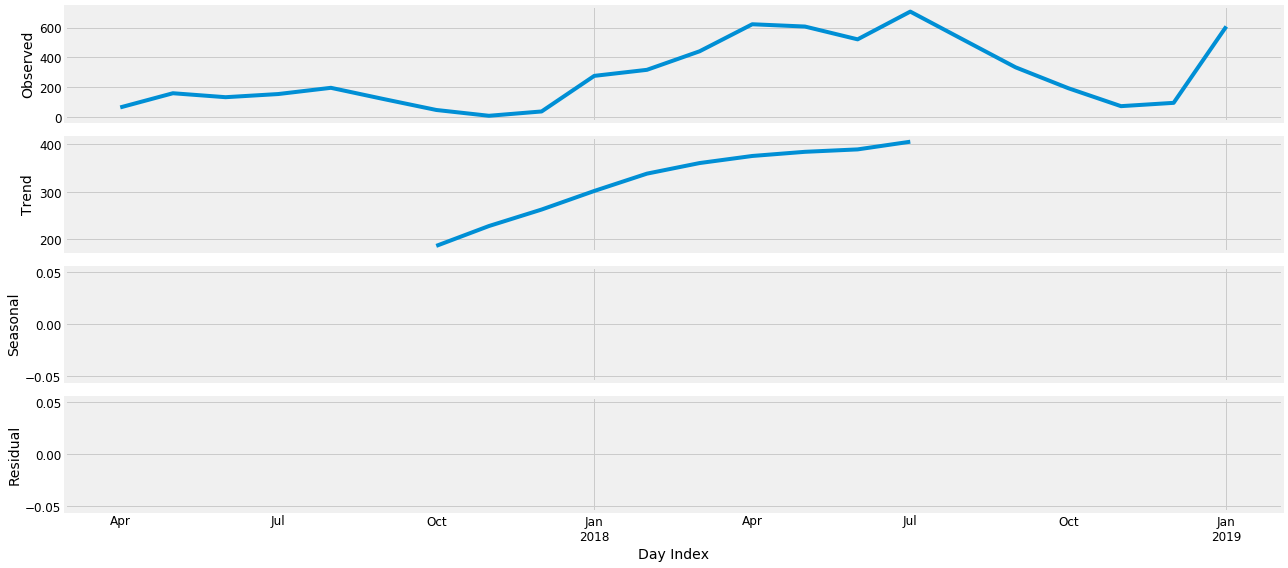

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(monthly, model='additive')
fig = decomposition.plot()
plt.show()

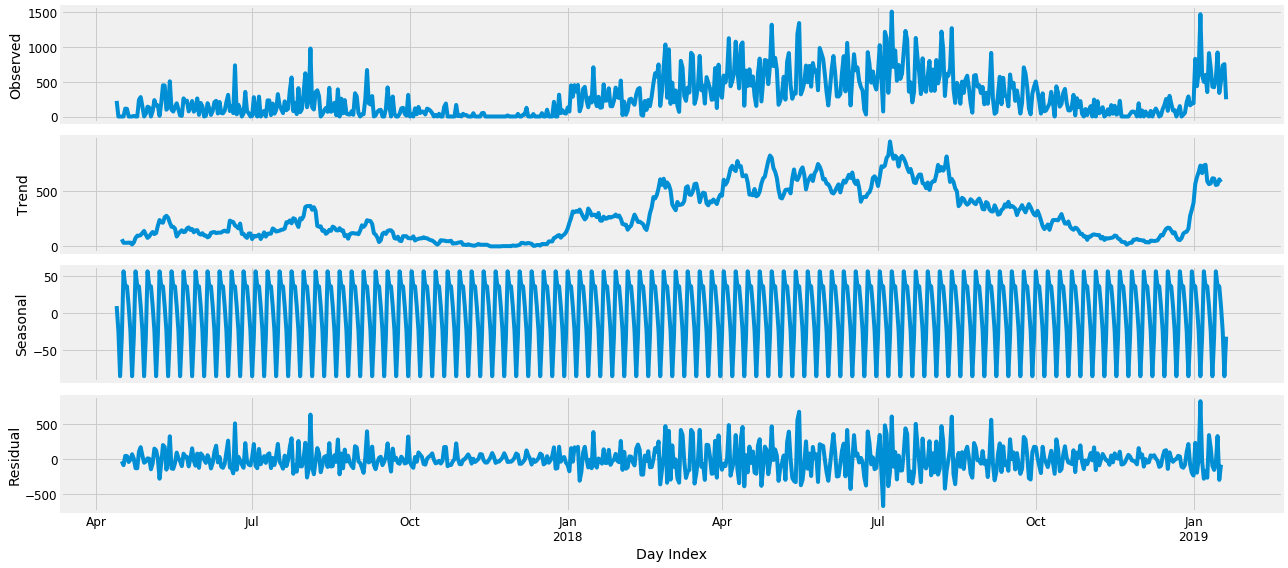

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(revenue['Revenue'], model='additive')
fig = decomposition.plot()
plt.show()

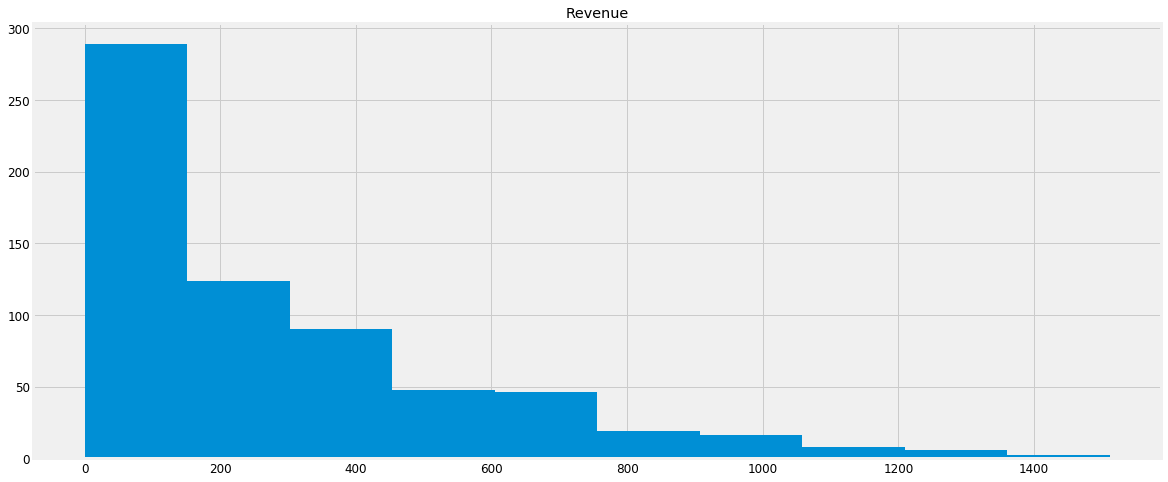

In [15]:
from matplotlib import pyplot

revenue.hist()
plt.show()

In [16]:
#dickey fuller test for daily revenue
from statsmodels.tsa.stattools import adfuller
# X = revenue.values
result = adfuller(revenue['Revenue'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.522103
p-value: 0.522550
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


In [17]:
#dickey fuller test for monthly revenue
from statsmodels.tsa.stattools import adfuller
# X = revenue.values
result = adfuller(monthly.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.912169
p-value: 0.993247
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [18]:
#dickey fuller test for monthly revenue
from statsmodels.tsa.stattools import adfuller
# X = revenue.values
result = adfuller(weekly.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.617114
p-value: 0.474242
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584


In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
                
AIC_list = []    
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(revenue['Revenue'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            AIC_score = 'ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic)
            AIC_list.append(AIC_score)
        except:
            continue

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packa

In [ ]:
AIC_list

In [ ]:
#Monthly

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
                
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
# mod = sm.tsa.statespace.SARIMAX(monthly,
#                                 order=(0, 1, 1),
#                                 seasonal_order=(0, 1, 0, 12),
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False)
# results = mod.fit()
# print(results.summary().tables[1])

In [22]:
mod = sm.tsa.statespace.SARIMAX(revenue['Revenue'],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 0, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1060      0.036      2.907      0.004       0.035       0.177
ma.L1         -0.9991      0.040    -24.847      0.000      -1.078      -0.920
sigma2      8.852e+04   5624.705     15.737      0.000    7.75e+04    9.95e+04


In [23]:
mod = sm.tsa.statespace.SARIMAX(revenue['Revenue'],
                                trend='n',
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

pred = results.get_prediction(start=pd.to_datetime('2018-06-01'), dynamic=False)
# pred_ci = pred.conf_int()
y_forecasted = pred.predicted_mean
y_truth = revenue['Revenue']['2018-06-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8651      0.016    -52.436      0.000      -0.897      -0.833
ma.S.L7       -1.1027      0.020    -54.241      0.000      -1.143      -1.063
sigma2      3.611e+04   1922.526     18.782      0.000    3.23e+04    3.99e+04
The Mean Squared Error of our forecasts is 55650.81
The Root Mean Squared Error of our forecasts is 235.9


The summary attribute that results from the output of SARIMAX returns a significant amount of information, but we'll focus our attention on the table of coefficients. The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

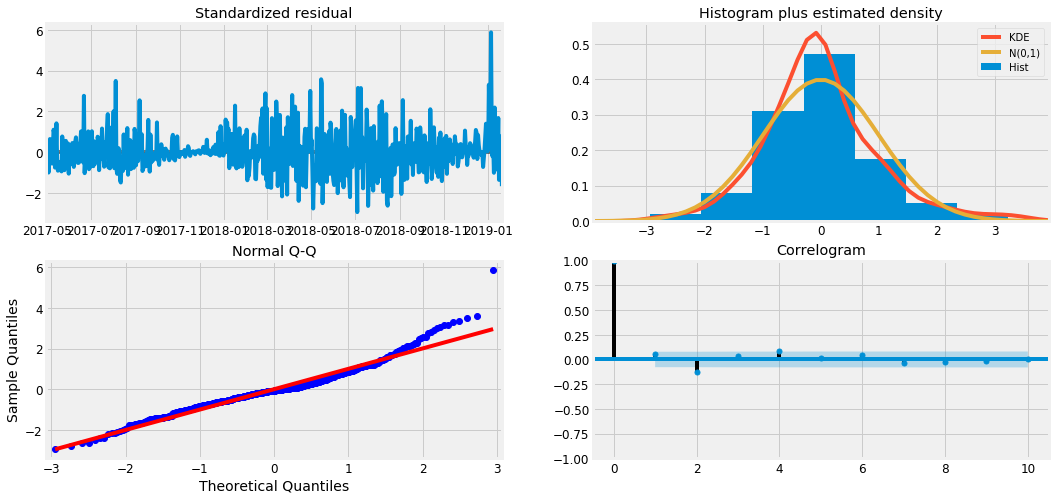

In [24]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

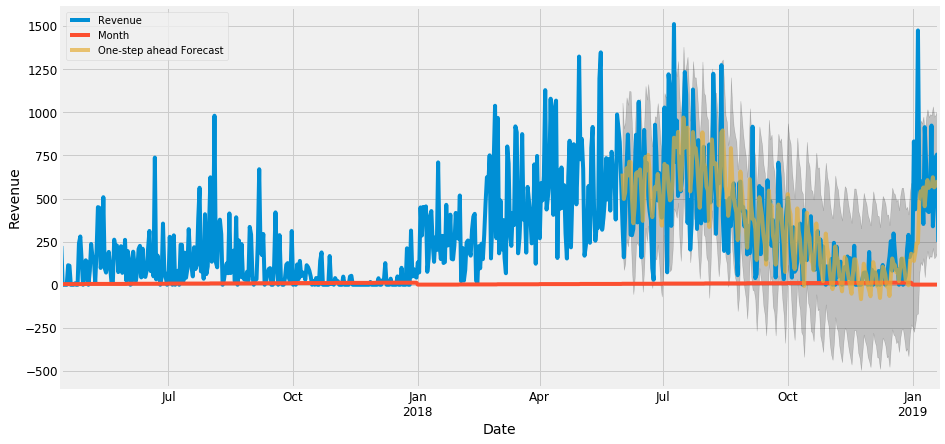

In [40]:
pred = results.get_prediction(start=pd.to_datetime('2018-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = revenue['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()
plt.show()

In [42]:
pred.conf_int().head()

,lower Revenue,upper Revenue
2018-06-01,234.155894,1055.518933
2018-06-02,86.516175,907.879185
2018-06-03,123.313861,944.676850
2018-06-04,265.153321,1086.516295
2018-06-05,222.472972,1043.835935


In [26]:
train_2018 = pd.DataFrame(revenue['2018-06-01':'2019-01-20'].Revenue)

# jan_forecast.join(pd.DataFrame(full_dates['2019-01-01':]['users']), on='ds').to_csv('jan_forecast.csv')

In [64]:
pred_2018

,Predicted_Revenue
2018-06-01,644.837413
2018-06-02,497.197680
2018-06-03,533.995356
2018-06-04,675.834808
2018-06-05,633.154454
2018-06-06,713.343943
2018-06-07,710.859320
2018-06-08,500.963391
2018-06-09,356.594628
2018-06-10,449.838810


In [65]:
join_2018 = train_2018.join(pred_2018).join(pred.conf_int())

In [71]:
join_2018.head()

,Revenue,Predicted_Revenue,lower Revenue,upper Revenue
Day Index,,,,
2018-06-01,350.04,644.837413,234.155894,1055.518933
2018-06-02,159.42,497.197680,86.516175,907.879185
2018-06-03,406.40,533.995356,123.313861,944.676850
2018-06-04,686.48,675.834808,265.153321,1086.516295
2018-06-05,871.40,633.154454,222.472972,1043.835935


In [76]:
revenue_forecast_and_actuals = pd.concat([join_2018, join_2019])

In [74]:
join_2019 = pred_2019.join(pred_ci)

In [77]:
revenue_forecast_and_actuals

,Predicted_Revenue,Revenue,lower Revenue,upper Revenue
2018-06-01,644.837413,350.04,234.155894,1055.518933
2018-06-02,497.197680,159.42,86.516175,907.879185
2018-06-03,533.995356,406.40,123.313861,944.676850
2018-06-04,675.834808,686.48,265.153321,1086.516295
2018-06-05,633.154454,871.40,222.472972,1043.835935
2018-06-06,713.343943,627.57,302.662465,1124.025420
2018-06-07,710.859320,289.82,300.177846,1121.540794
2018-06-08,500.963391,287.55,90.281944,911.644837
2018-06-09,356.594628,323.67,-54.086807,767.276062
2018-06-10,449.838810,636.95,39.157383,860.520236


In [33]:
intervals = pred.conf_int()

In [78]:
revenue_forecast_and_actuals.to_csv('rev_forecast_and_actuals.csv')

In [92]:
rev_forecast = pd.read_csv('rev_forecast_and_actuals.csv')
rev_forecast.columns = ['date', 'predicted_revenue', 'revenue', 'lower_rev', 'upper_rev']
rev_forecast.date = pd.to_datetime(rev_forecast.date)

In [96]:
list(rev_forecast.upper_rev)

[1055.5189325201904,
 907.8791848104123,
 944.6768504480724,
 1086.5162952455569,
 1043.8359353998212,
 1124.0254199437172,
 1121.5407938558237,
 911.6448373859528,
 767.27606232211,
 860.5202364667954,
 1056.0752801696838,
 1063.525805463025,
 1045.0776069482108,
 1079.4217885747196,
 931.2763499770903,
 781.1338774586933,
 924.2432471343213,
 1152.1560003117502,
 1073.8145080331424,
 1163.8059065722773,
 1067.4544808692335,
 869.2689474954852,
 802.906162512323,
 901.351919693038,
 977.1276172046856,
 968.1002640902217,
 1053.0417823512767,
 966.485216745502,
 822.3323294182472,
 753.2218359222306,
 878.7641804004576,
 1111.2521599848533,
 1086.9916542939457,
 1098.8612419130204,
 971.0231838409636,
 900.2868839831851,
 911.869115933264,
 1022.0750281499727,
 1263.4956102564106,
 1246.5183006558295,
 1210.1759951785816,
 1297.1726408376135,
 1094.005164730262,
 960.3382592413147,
 1115.0425757389703,
 1380.2527372527984,
 1206.046732043329,
 1269.2472252151504,
 1321.6264098114787,
 

In [28]:
pred_2018 = pd.DataFrame(pred.predicted_mean, columns = ['Predicted_Revenue'])

In [252]:
pred_2018.head()

,Predicted_Revenue
2018-06-01,644.837413
2018-06-02,497.197680
2018-06-03,533.995356
2018-06-04,675.834808
2018-06-05,633.154454


In [86]:
y_forecasted = pred.predicted_mean
y_truth = revenue['Revenue']['2018-06-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# y_forecasted = pred.predicted_mean
# y_truth = revenue['2018-01-01':]
# mse = ((y_forecasted - y_truth) ** 2).mean()
# print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 55650.81


In [88]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 235.9


Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily revenue in the test set within 235.9 of the real sales. Our daily revenue ranges from around 0 to 1,674. In my opinion, this is a pretty good model so far.

## Visualizing Forecasts

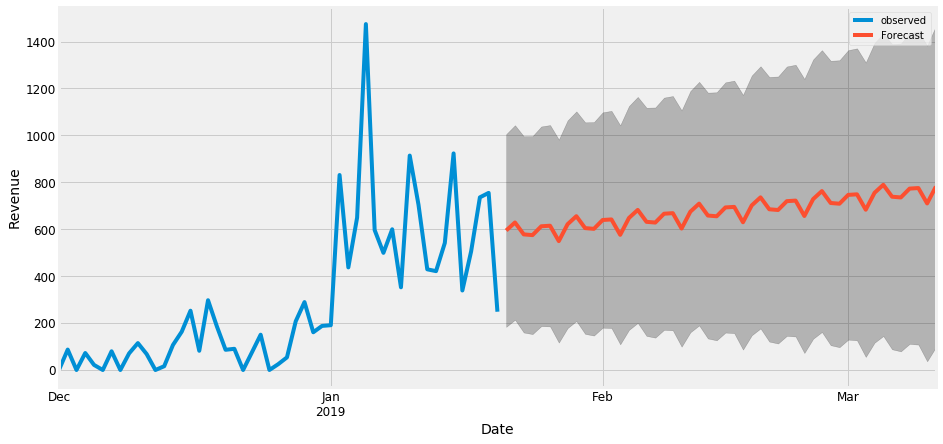

In [52]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = revenue['Revenue']['2018-12-1':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()
plt.show()

In [58]:
pred_2019

,Predicted_Revenue
2019-01-21,594.566785
2019-01-22,628.776212
2019-01-23,578.008611
2019-01-24,574.887506
2019-01-25,612.551220
2019-01-26,614.930526
2019-01-27,549.411351
2019-01-28,621.328736
2019-01-29,655.538163
2019-01-30,604.770562


In [57]:
pred_2019 = pd.DataFrame(pred_uc.predicted_mean, columns = ['Predicted_Revenue'])

# ARIMA

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

## Dickey Fuller For Weekly

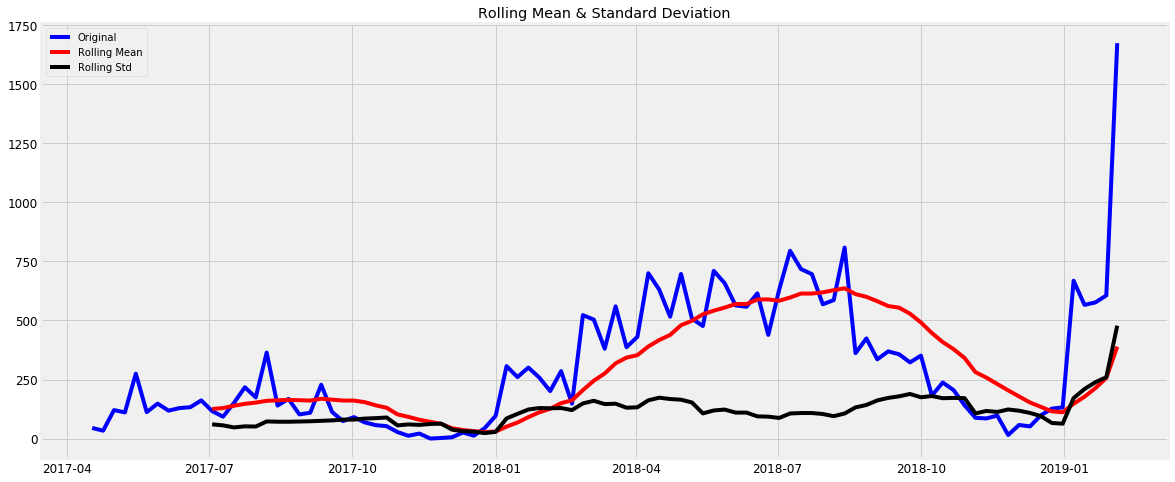

Results of Dickey-Fuller Test:
Test Statistic                 -1.366240
p-value                         0.598350
#Lags Used                      7.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


In [73]:
test_stationarity(weekly)

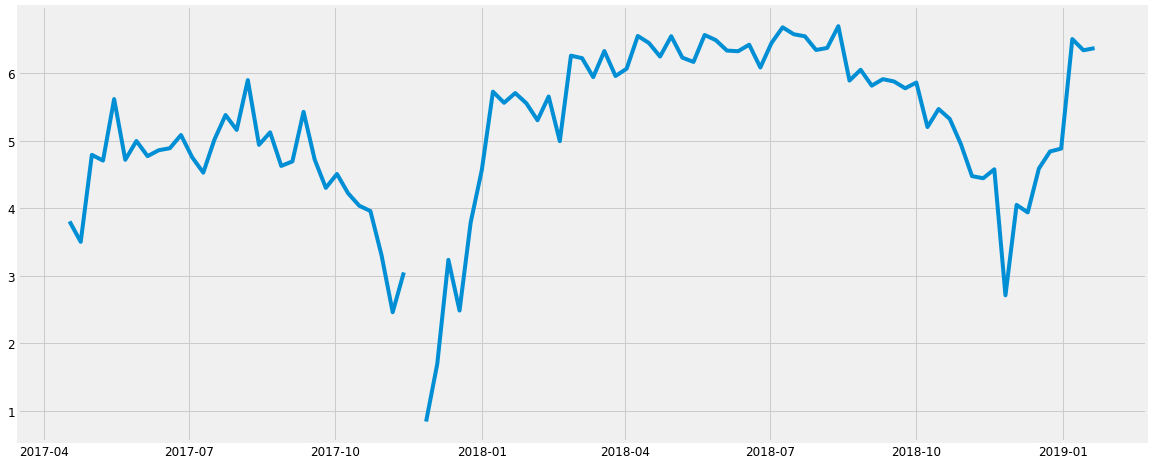

In [21]:
ts_log = np.log(weekly)
plt.plot(ts_log)

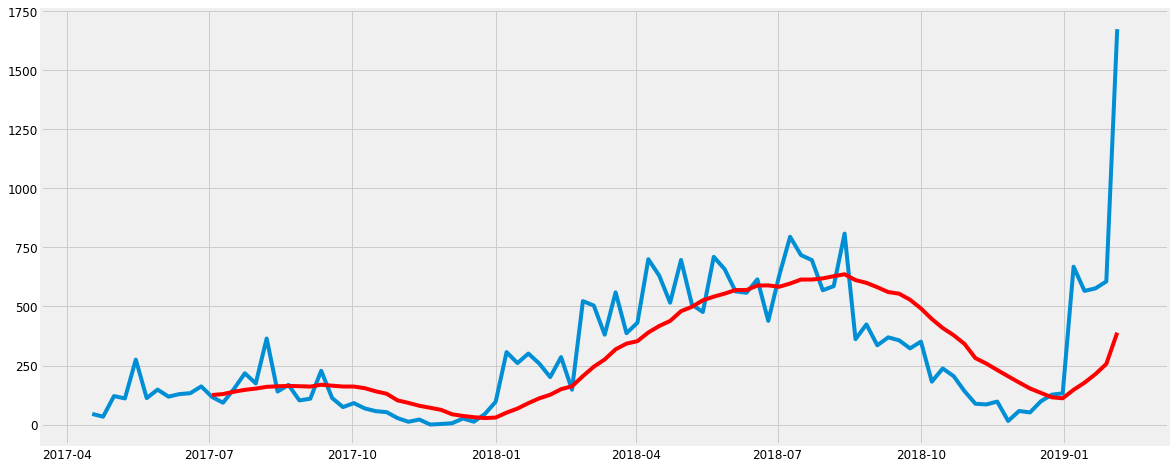

In [75]:
moving_avg = weekly.rolling(12).mean()
plt.plot(weekly)
plt.plot(moving_avg, color='red')

In [76]:
ts_log_moving_avg_diff = weekly - moving_avg
ts_log_moving_avg_diff.head(12)

Day Index
2017-04-17         NaN
2017-04-24         NaN
2017-05-01         NaN
2017-05-08         NaN
2017-05-15         NaN
2017-05-22         NaN
2017-05-29         NaN
2017-06-05         NaN
2017-06-12         NaN
2017-06-19         NaN
2017-06-26         NaN
2017-07-03   -8.869405
Freq: W-MON, Name: Revenue, dtype: float64

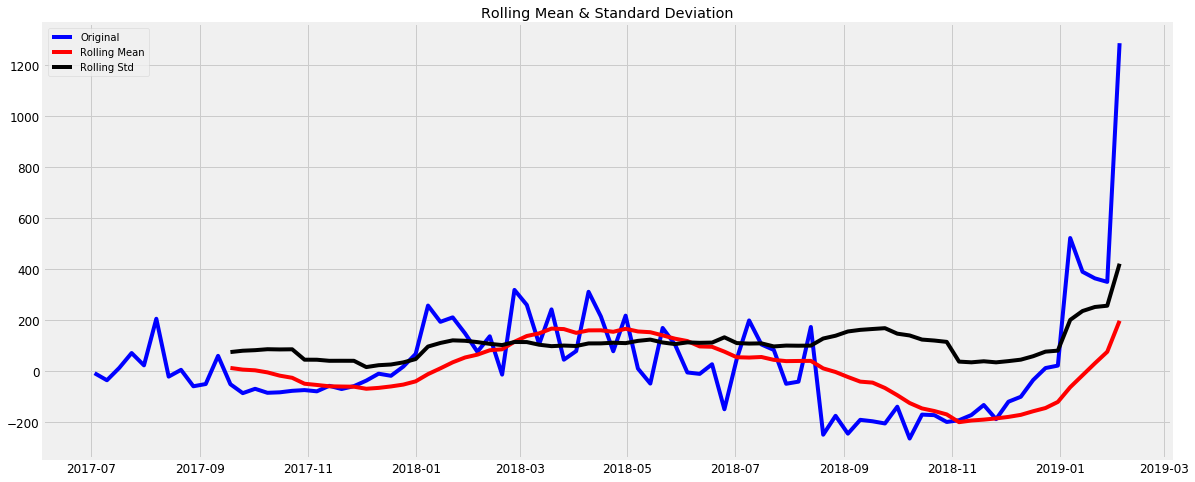

Results of Dickey-Fuller Test:
Test Statistic                 -1.606964
p-value                         0.480094
#Lags Used                      9.000000
Number of Observations Used    74.000000
Critical Value (1%)            -3.521980
Critical Value (5%)            -2.901470
Critical Value (10%)           -2.588072
dtype: float64


In [77]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

## Dickey Fuller for Daily

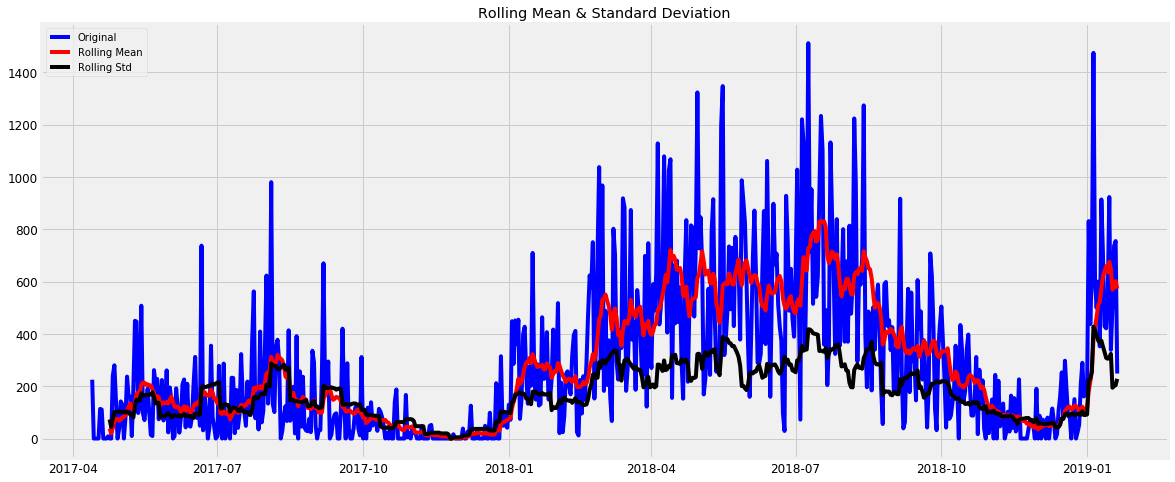

Results of Dickey-Fuller Test:
Test Statistic                  -1.522103
p-value                          0.522550
#Lags Used                      19.000000
Number of Observations Used    628.000000
Critical Value (1%)             -3.440806
Critical Value (5%)             -2.866153
Critical Value (10%)            -2.569227
dtype: float64


In [49]:
test_stationarity(revenue['Revenue'])

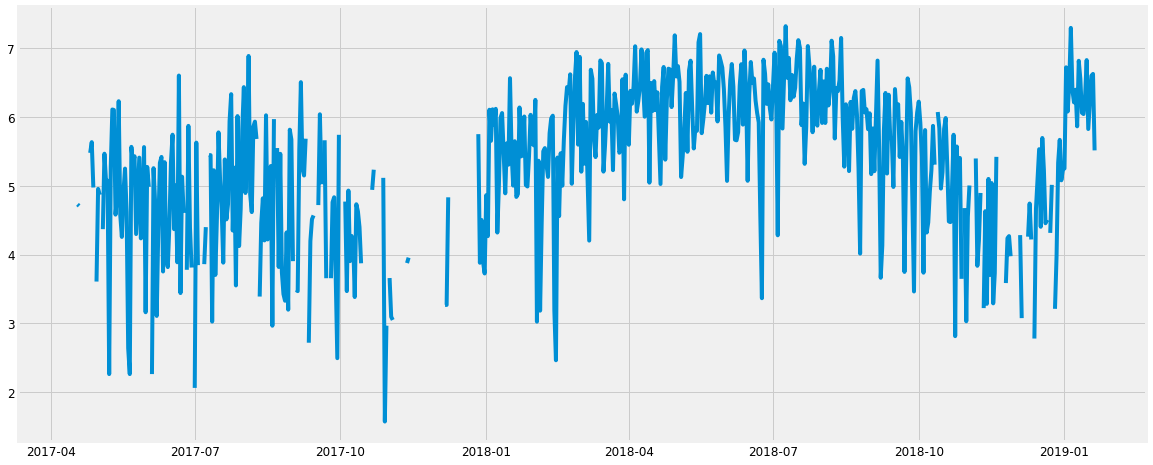

In [50]:
daily_ts_log = np.log(revenue['Revenue'])
plt.plot(daily_ts_log)

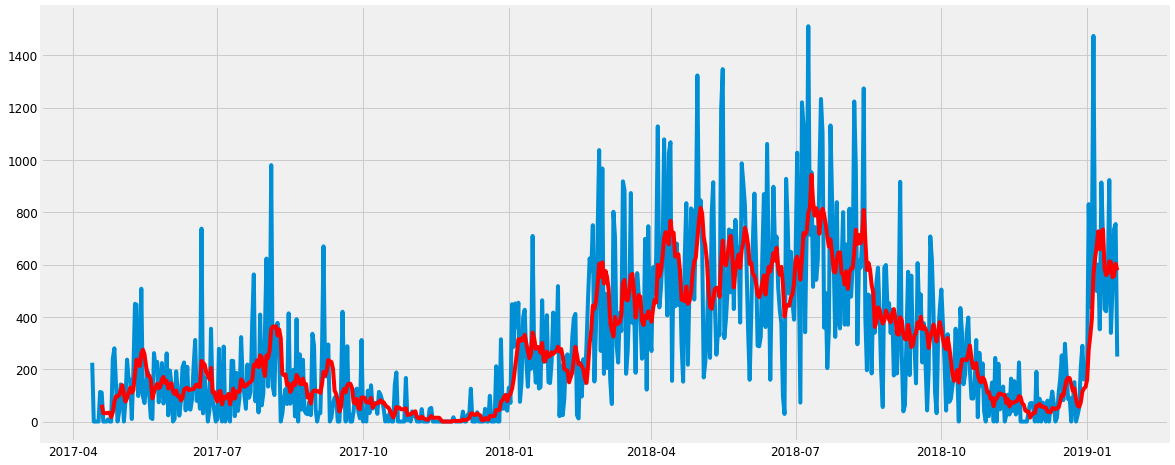

In [51]:
daily_moving_avg = revenue['Revenue'].rolling(7).mean()
plt.plot(revenue['Revenue'])
plt.plot(daily_moving_avg, color='red')

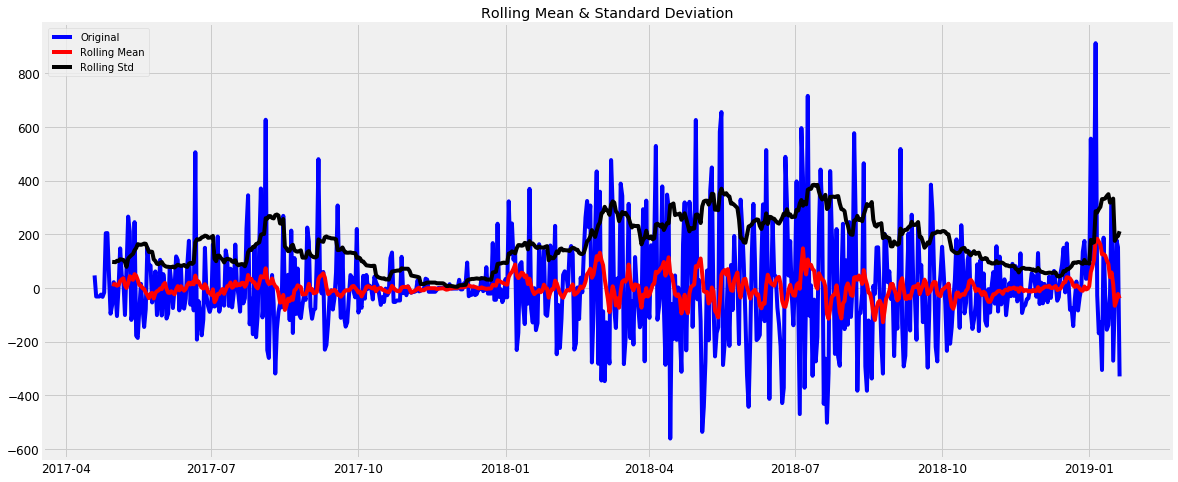

Results of Dickey-Fuller Test:
Test Statistic                -8.636582e+00
p-value                        5.569695e-14
#Lags Used                     1.600000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [52]:
daily_ts_log_moving_avg_diff = revenue['Revenue'] - daily_moving_avg
daily_ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(daily_ts_log_moving_avg_diff)

### ACF and PACF to figure out p and q values

In [53]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

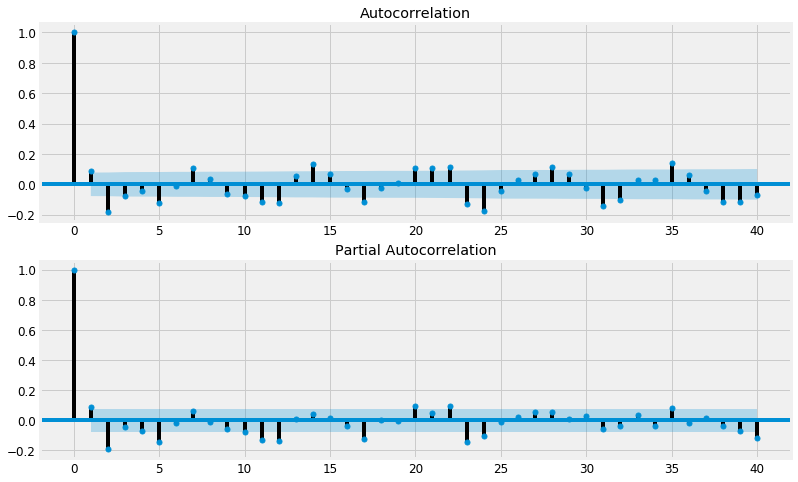

In [54]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(daily_ts_log_moving_avg_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(daily_ts_log_moving_avg_diff, lags=40, ax=ax2)

In [128]:
lag_acf = acf(daily_moving_avg.dropna(), nlags=200)
lag_pacf = pacf(daily_moving_avg.dropna(), nlags=20, method='ols')

## Taking First Difference

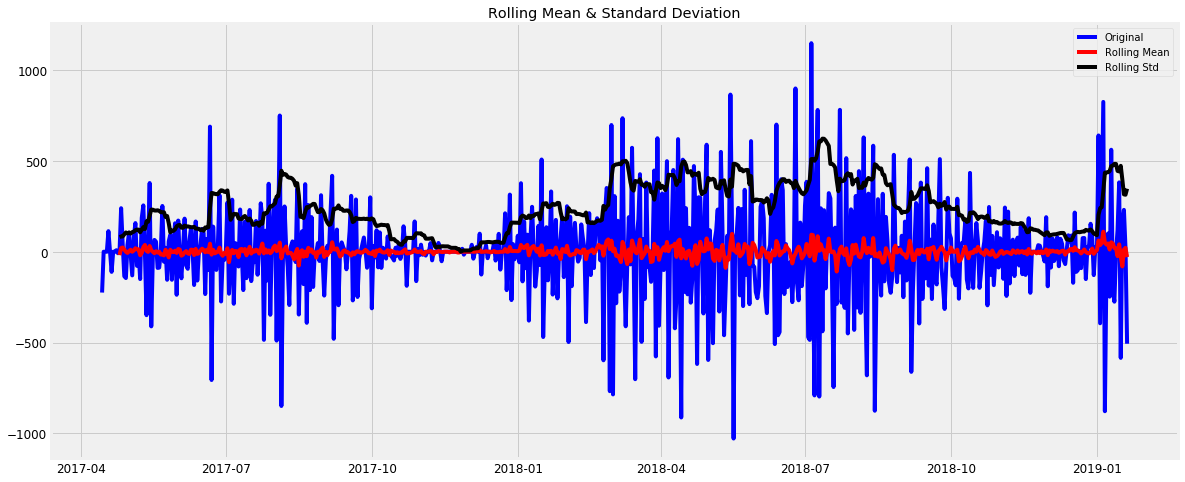

Results of Dickey-Fuller Test:
Test Statistic                -8.865812e+00
p-value                        1.441531e-14
#Lags Used                     2.000000e+01
Number of Observations Used    6.260000e+02
Critical Value (1%)           -3.440839e+00
Critical Value (5%)           -2.866168e+00
Critical Value (10%)          -2.569235e+00
dtype: float64


In [36]:
revenue['first_difference'] = revenue['Revenue'] - revenue['Revenue'].shift(1)  
test_stationarity(revenue.first_difference.dropna(inplace=False))

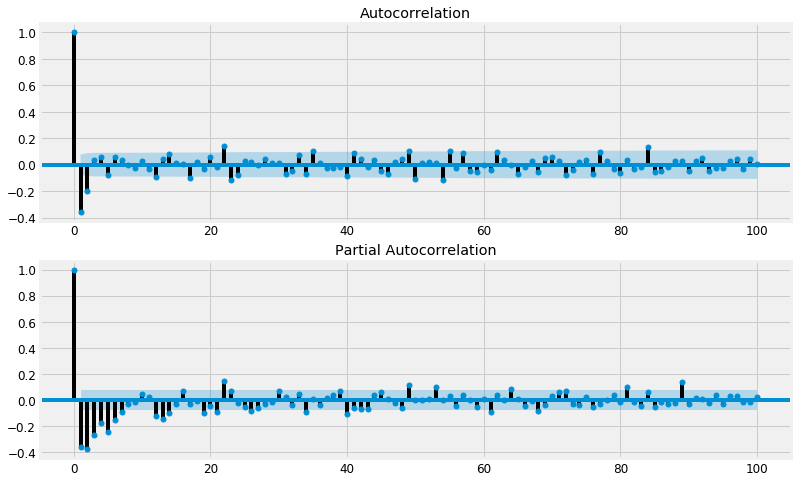

In [48]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(revenue.first_difference.dropna(inplace=False), lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(revenue.first_difference.dropna(inplace=False), lags=100, ax=ax2)

## Using Prophet

In [161]:
revenue= revenue.reset_index()

In [163]:
revenue.dtypes

Day Index    datetime64[ns]
Revenue             float64
Weekday            category
dtype: object

In [167]:
revenue = revenue.drop(columns = 'Weekday')

In [168]:
revenue.head()

,Day Index,Revenue
0,2017-04-13,224.8
1,2017-04-14,0.0
2,2017-04-15,0.0
3,2017-04-16,0.0
4,2017-04-17,0.0


In [169]:
revenue.columns = ["ds", "y"]
revenue.head()

,ds,y
0,2017-04-13,224.8
1,2017-04-14,0.0
2,2017-04-15,0.0
3,2017-04-16,0.0
4,2017-04-17,0.0


In [170]:
m1 = Prophet()
m1.fit(revenue)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [172]:
future1 = m1.make_future_dataframe(periods=30)

In [173]:
forecast1 = m1.predict(future1)

In [174]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
673,2019-02-15,106.110673,-204.878952,386.608681
674,2019-02-16,45.811966,-224.732698,350.331233
675,2019-02-17,91.400352,-194.998499,392.503544
676,2019-02-18,177.309995,-131.426475,455.745271
677,2019-02-19,156.575597,-129.714267,442.460589


In [175]:
np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
673,1.211378e+46,1.052450e-89,7.980259e+167
674,7.868354e+19,2.510900e-98,1.402560e+152
675,4.950720e+39,2.056970e-85,2.898167e+170
676,1.011003e+77,8.360015e-58,8.465571e+197
677,9.998111e+67,4.632436e-57,1.439435e+192


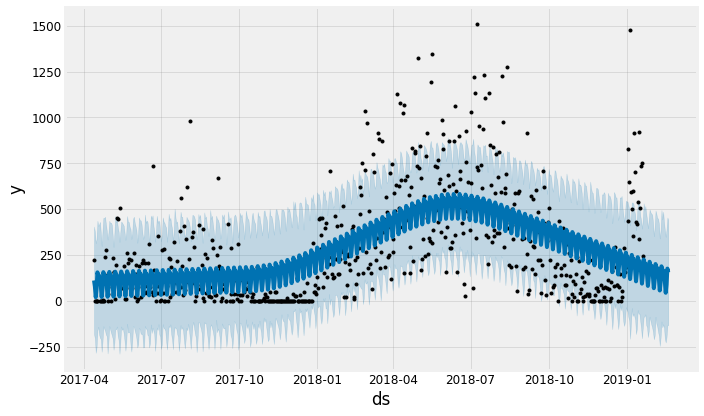

In [176]:
m1.plot(forecast1);

In [185]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-04-13,102.002509,-179.397910,406.376308,102.002509,102.002509,10.807440,10.807440,10.807440,10.807440,10.807440,10.807440,0.0,0.0,0.0,112.809949
1,2017-04-14,102.165660,-202.458987,378.489489,102.165660,102.165660,-22.236175,-22.236175,-22.236175,-22.236175,-22.236175,-22.236175,0.0,0.0,0.0,79.929485
2,2017-04-15,102.328811,-281.002507,316.024106,102.328811,102.328811,-80.758811,-80.758811,-80.758811,-80.758811,-80.758811,-80.758811,0.0,0.0,0.0,21.570001
3,2017-04-16,102.491962,-250.091252,338.469915,102.491962,102.491962,-33.394353,-33.394353,-33.394353,-33.394353,-33.394353,-33.394353,0.0,0.0,0.0,69.097609
4,2017-04-17,102.655113,-158.660121,437.901369,102.655113,102.655113,54.291361,54.291361,54.291361,54.291361,54.291361,54.291361,0.0,0.0,0.0,156.946475
5,2017-04-18,102.818264,-138.994925,409.656391,102.818264,102.818264,35.333035,35.333035,35.333035,35.333035,35.333035,35.333035,0.0,0.0,0.0,138.151299
6,2017-04-19,102.981416,-181.587690,417.401401,102.981416,102.981416,35.957504,35.957504,35.957504,35.957504,35.957504,35.957504,0.0,0.0,0.0,138.938919
7,2017-04-20,103.144567,-199.347450,431.795184,103.144567,103.144567,10.807440,10.807440,10.807440,10.807440,10.807440,10.807440,0.0,0.0,0.0,113.952006
8,2017-04-21,103.307718,-206.554995,371.521676,103.307718,103.307718,-22.236175,-22.236175,-22.236175,-22.236175,-22.236175,-22.236175,0.0,0.0,0.0,81.071543
9,2017-04-22,103.470869,-275.426465,300.631699,103.470869,103.470869,-80.758811,-80.758811,-80.758811,-80.758811,-80.758811,-80.758811,0.0,0.0,0.0,22.712058


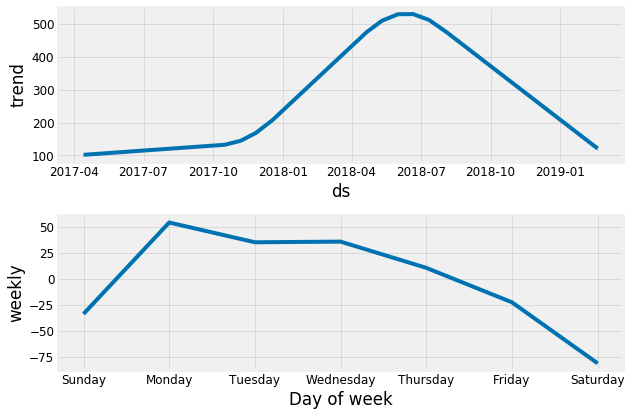

In [177]:
m1.plot_components(forecast1);


In [184]:
mean_squared_error(y_true=revenue['4-13-2017'],
                   y_pred=forecast1['yhat'])

mean_squared_error(y_true=traffic_test['users'],
                   y_pred=traffic_test_forecast['yhat'])

ValueError: Found input variables with inconsistent numbers of samples: [648, 678]